# **Question No.2. NLP Dataset**

### **1. Import Libraries/Dataset**

##### ***a. Import the required Libraries***

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras import regularizers
import tensorflow.keras as keras
print("Tensorflow Version : ",tf.__version__)

Tensorflow Version :  2.4.1


##### ***Import Dataset***

In [ ]:
data_path = tf.keras.utils.get_file("IMDB_Dataset.csv", "https://studymachinelearning.com/wp-content/uploads/2020/03/IMDB-Dataset.csv",)
data_path 

'/root/.keras/datasets/IMDB_Dataset.csv'

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
df.shape

(50000, 2)

In [ ]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

##### ***b. Check the GPU available (recommended- use free GPU provided by Google Colab)***

In [ ]:
!nvidia-smi

Sun May 23 11:18:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **2. Data Visualization**

##### ***a. Print at least two movie reviews from each class of the dataset, for a sanity check that labels match the text***

In [ ]:
print(f"Review : \n\n{df['review'].iloc[1]} \n ")
print(f"Label  : {df['sentiment'].iloc[1]}")

Review : 

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly w

In [ ]:
print(f"Review : \n\n{df['review'].iloc[3]} \n ")
print(f"Label  : {df['sentiment'].iloc[3]}")

Review : 

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them. 
 
Label  : negative


##### ***b. Plot a bar graph of class distribution in a dataset. Each bar depicts the number of tweets belonging to a particular sentiment. (recommended - matplotlib/seaborn libraries)***

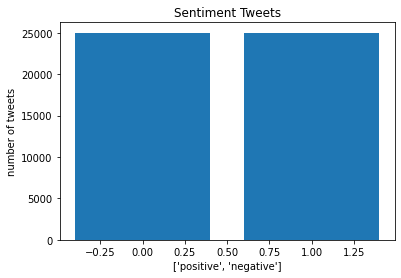

In [ ]:
counts = df["sentiment"].value_counts()
plt.bar(range(len(counts)), counts)
labels = ['positive', 'negative']
# plt.xticks(x, labels, rotation='vertical')  look into this
plt.xlabel(labels)
plt.ylabel('number of tweets')
plt.title(label='Sentiment Tweets') 
plt.show()

##### ***c. Any other visualizations that seem appropriate for this problem are encouraged but not necessary, for the points***

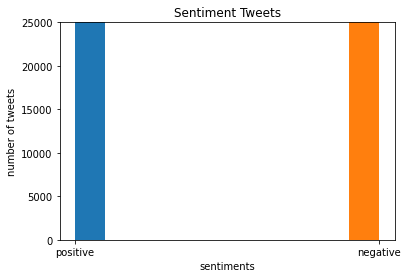

In [ ]:
positive_tweets = df["sentiment"][df["sentiment"] == "positive"]
negative_tweets = df["sentiment"][df["sentiment"] == "negative"]
plt.hist([
         positive_tweets,
         negative_tweets
    ],
     stacked=True,
     label=["positive", "negative"])
plt.title("Sentiment Tweets")
plt.xlabel("sentiments")
plt.ylabel("number of tweets")
plt.show()

##### ***d. Print the shapes of train and test data***

In [ ]:
df['sentiment'] = df['sentiment'].map({'positive':0,'negative':1})

train_df = df.sample(frac=0.8,random_state=100)
test_df = df.drop(train_df.index)

print(f"Train data shape: {train_df.shape}")
print(f"Test  data shape: {test_df.shape}")

Train data shape: (40000, 2)
Test  data shape: (10000, 2)


### **3. Data Pre-processing**

##### ***a. Since the ML models cannot accept string inputs or cannot be of the string format, machine can understand the numbers only not a text, so converting text word to number by assigning the unique number to each word. This process is called tokenization and a unique number which assigns to a word is called token.***

In [ ]:
tokenizer  = tf.keras.preprocessing.text.Tokenizer(num_words=8000)
tokenizer.fit_on_texts(np.append(train_df['review'].values,test_df['review'].values))

word_index = tokenizer.word_index
nb_words = len(word_index) + 1

train_seq = tokenizer.texts_to_sequences(train_df["review"])
test_seq = tokenizer.texts_to_sequences(test_df["review"])

train_data = tf.keras.preprocessing.sequence.pad_sequences(train_seq, maxlen=100)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_seq, maxlen=100)

print(f"Train data shape: {train_data.shape}")
print(f"Test  data shape: {test_data.shape}")

Train data shape: (40000, 100)
Test  data shape: (10000, 100)


##### ***tokenizer.word_index returns the dictionary of words along with their uniquely assigned integer number. Let’s print how many unique word present in our dataset.***

In [ ]:
len(word_index)

124252

##### ***c. Bring the train and test data in the required format.***

In [ ]:
train_label = train_df['sentiment'].values
test_label = test_df['sentiment'].values

In [ ]:
print(train_label.dtype)
print(test_label.dtype)

int64
int64


### **4. Model Building**

***a. Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.***

***b. Add L2 regularization to all the layers.***

***c. Add one layer of dropout at the appropriate position and give reasons.***

***d. Choose the appropriate activation function for all the layers.***

***e. Print the model summary.***

In [ ]:
dnnModel = models.Sequential()

dnnModel.add(layers.Dense(64, activation='relu', input_shape=(100,)))

# Add dropout of 50% to layer 1
dnnModel.add(layers.Dropout(0.5))

# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Layer 4 = hidden layer 
dnnModel.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Layer 5 = hidden layer 
dnnModel.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Layer 6 = output layer
dnnModel.add(layers.Dense(1, activation='sigmoid'))


**Reasons for using dropout layer**

*Generally dropout value of 20%-50% of neurons providing a good starting point. In larger network, we are likely to get better performance when dropout is used, giving the model more of an opportunity to learn independent representations.*

In [ ]:
dnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 13,249
Trainable params: 13,249
Non-trainable params: 0
____________________________________________________

### **5. Model Compilation**

***a. Compile the model with the appropriate loss function.***

***b. Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.***

***c. Use accuracy as a metric.***

In [ ]:
dnnModel.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


**Reason for using Binary cross-entropy loss function**

*Binary cross-entropy which is another special case of cross-entropy used as loss function. As our target is either 0 or 1. In a neural network,we  typically achieve this prediction by sigmoid activation. This loss can be computed with the cross-entropy function since we are now comparing just two probability vectors or even with categorical cross-entropy since our target is a one-hot vector. It can also be computed without the conversion with a binary cross-entropy.*

**Reason for using adam optimizer**

*Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.*

*Attractive benefits of using Adam on non-convex optimization problems, as follows:*

*   Straightforward to implement.
*   Computationally efficient.
*   Little memory requirements.
*   Invariant to diagonal rescale of the gradients.
*   Well suited for problems that are large in terms of data and/or parameters.
*   Appropriate for non-stationary objectives.
*   Appropriate for problems with very noisy/or sparse gradients.
*   Hyper-parameters have intuitive interpretation and typically require little tuning.

### **6. Model Training**


***a. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.***

***b. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.***

In [ ]:
import time

call_back = [tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=2,
verbose=1,restore_best_weights=True)]

start_time = time.time()

history = dnnModel.fit(train_data, train_label, epochs=10, batch_size=32,
          validation_data = (test_data,test_label),
          callbacks=call_back)

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 39.9832 - accuracy: 0.4982 - val_loss: 1.8740 - val_accuracy: 0.4959
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9393 - accuracy: 0.4957 - val_loss: 1.7955 - val_accuracy: 0.4964
Epoch 3/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7911 - accuracy: 0.5022 - val_loss: 1.6808 - val_accuracy: 0.4971
Epoch 4/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6508 - accuracy: 0.5021 - val_loss: 1.5171 - val_accuracy: 0.5031
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.4711 - accuracy: 0.5017 - val_loss: 1.3082 - val_accuracy: 0.5036
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.2519 - accuracy: 0.4958 - val_loss: 1.0826 - val_accuracy: 0.4964
Epoch 7/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.0309 - accuracy: 0.4979 - val_loss: 0.8895 - val_accuracy

In [ ]:
print("Total Time taken for Training: ", time.time() - start_time, "Seconds")

Total Time taken for Training:  21.179584741592407 Seconds


In [ ]:
 history.history

{'accuracy': [0.4975000023841858,
  0.500124990940094,
  0.5017750263214111,
  0.49877500534057617,
  0.5011749863624573,
  0.4954499900341034,
  0.49912500381469727],
 'loss': [13.917261123657227,
  1.8941185474395752,
  1.758588433265686,
  1.6087604761123657,
  1.418562412261963,
  1.1954461336135864,
  0.9818615913391113],
 'val_accuracy': [0.4959000051021576,
  0.49639999866485596,
  0.49709999561309814,
  0.5030999779701233,
  0.503600001335144,
  0.49639999866485596,
  0.49639999866485596],
 'val_loss': [1.8740124702453613,
  1.7954621315002441,
  1.680797815322876,
  1.5171185731887817,
  1.308198094367981,
  1.0825997591018677,
  0.8894959092140198]}

In [ ]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

Final training loss 	 0.9818615913391113
Final training accuracy  0.49912500381469727


##### ***Training and Validation Loss Graph***

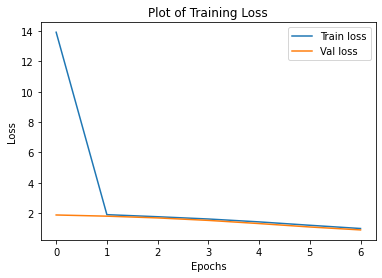

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()


##### ***Training and Validation Accuracy Graph***

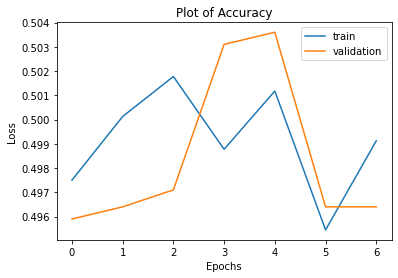

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

### **7. Model Evaluation**

***a. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.***

In [ ]:
loss, accuracy = dnnModel.evaluate(test_data,test_label)

print(f"Accuracy : {accuracy}")
print(f"Loss     : {loss}")

313/313 [==============================] - 1s 2ms/step - loss: 1.3082 - accuracy: 0.5036
Accuracy : 0.503600001335144
Loss     : 1.308198094367981


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



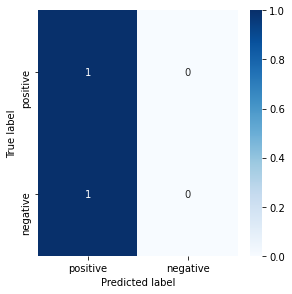

In [ ]:
classes=["positive","negative"]
y_pred= dnnModel.predict_classes(test_data)
con_mat = tf.math.confusion_matrix(labels= test_label, predictions=y_pred).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(4, 4))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


##### **Analyse and report the best and worst performing class**



*   The **best** performing class here is the **'positive'**
*   The **worst** performing class here is the **'negative'**



***b. Print the two most incorrectly classified texts for each class in the test dataset.***

In [ ]:
predictions = dnnModel.predict(test_data, verbose=0)

In [ ]:
# Combining the test data (in textual format) along with the predicted values
testData_text = tokenizer.sequences_to_texts(test_data)
testData_text
dictionary_TestData_PredictedValue = {}
for index in range(len(test_data)):
  dictionary_TestData_PredictedValue[testData_text[index]] = predictions[index]

#Worst two text with the predicted values
sortedData = sorted(dictionary_TestData_PredictedValue.items(), key=operator.itemgetter(1))

print("\nMost incorrectly classified texts from test dataset with their accuracy are:")

print(sortedData[0])
print(sortedData[1])


Most incorrectly classified texts from test dataset with their accuracy are:
('my favourite police series of all time turns to a tv film does it work yes gee runs for mayor and gets shot the homicide hall of fame turns up and nearly all of the cops who ever played in this series a lot of flashbacks helps you who seen the tv series but it the fans too the last five minutes another murder and at the very end even two of the dead cops turn up and a short appearance from my favourite cox this is a good film', array([0.48786372], dtype=float32))
('in bollywood nowadays it has no or and has given the a human story here no one country is depicted as good or bad there are evil indians evil and good indians and the cinematography is excellent and the music is meaningful thanks to and haunting everything about the movie was amazing and the acting just took my breath away all were perfectly cast br br if you are interested in watching an intellectual and genuinely wonderful movie look no further

#### **Hyperparameter Tuning**

**Use a different optimizer with the appropriate LR value**

###### *Changing the Model Optimizer to `rmsprop` instead of `adam`*

In [ ]:
dnnModelOptimizer = models.Sequential()

dnnModelOptimizer.add(layers.Dense(64, activation='relu', input_shape=(100,)))

# Add dropout of 50% to layer 1
dnnModelOptimizer.add(layers.Dropout(0.5))

# Layer 3 = hidden layer 
dnnModelOptimizer.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Layer 4 = hidden layer 
dnnModelOptimizer.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Layer 5 = hidden layer 
dnnModelOptimizer.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Layer 6 = output layer
dnnModelOptimizer.add(layers.Dense(1, activation='sigmoid'))

#Changing the Model Optimizer to `rmsprop` instead of `adam`
dnnModelOptimizer.compile(optimizer='rmsprop',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

dnnModelOptimizer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                6464      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 13,249
Trainable params: 13,249
Non-trainable params: 0
__________________________________________________

In [ ]:
call_back = [tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=2,
verbose=1,restore_best_weights=True)]

historyOptimizer = dnnModelOptimizer.fit(train_data, train_label, epochs=10, batch_size=32,
          validation_data = (test_data,test_label),
          callbacks=call_back)

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 32.6426 - accuracy: 0.5038 - val_loss: 0.7697 - val_accuracy: 0.5035
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.7340 - accuracy: 0.5012 - val_loss: 0.6971 - val_accuracy: 0.5035
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6953 - accuracy: 0.4968 - val_loss: 0.6932 - val_accuracy: 0.4964
Restoring model weights from the end of the best epoch.
Epoch 00003: early stopping


In [ ]:
print('Final training accuracy ', historyOptimizer.history['accuracy'][-1])
print('Final training loss \t', historyOptimizer.history['loss'][-1])

Final training accuracy  0.49597498774528503
Final training loss 	 0.694042444229126


**Change the value of batch size in model training**

##### *Changing the batch size to `64` instead of `32`*

In [ ]:
dnnModelBatchSize = models.Sequential()

dnnModelBatchSize.add(layers.Dense(64, activation='relu', input_shape=(100,)))

# Add dropout of 50% to layer 1
dnnModelBatchSize.add(layers.Dropout(0.5))

# Layer 3 = hidden layer 
dnnModelBatchSize.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Layer 4 = hidden layer 
dnnModelBatchSize.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Layer 5 = hidden layer 
dnnModelBatchSize.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )

# Layer 6 = output layer
dnnModelBatchSize.add(layers.Dense(1, activation='sigmoid'))

dnnModelBatchSize.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

dnnModelBatchSize.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                6464      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 13,249
Trainable params: 13,249
Non-trainable params: 0
__________________________________________________

In [ ]:
call_back = [tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=2,
verbose=1,restore_best_weights=True)]

#Changing the batch size to `64` instead of `32`
historyBatchSize = dnnModelBatchSize.fit(train_data, train_label, epochs=10, batch_size=64,
          validation_data = (test_data,test_label),
          callbacks=call_back)

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 32.8615 - accuracy: 0.4950 - val_loss: 1.9358 - val_accuracy: 0.5009
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 1.9594 - accuracy: 0.4961 - val_loss: 1.8899 - val_accuracy: 0.4933
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 1.8831 - accuracy: 0.5033 - val_loss: 1.8240 - val_accuracy: 0.5015
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 1.8074 - accuracy: 0.5037 - val_loss: 1.7454 - val_accuracy: 0.4977
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 1.7249 - accuracy: 0.4948 - val_loss: 1.6520 - val_accuracy: 0.4964
Restoring model weights from the end of the best epoch.
Epoch 00005: early stopping


In [ ]:
print('Final training accuracy ', historyBatchSize.history['accuracy'][-1])
print('Final training loss \t', historyBatchSize.history['loss'][-1])

Final training accuracy  0.4988499879837036
Final training loss 	 1.7014904022216797


### **Comparison of Model Results:**

**Basic Model (dnnModel) Vs Model with Change in Optimizer (dnnModelOptimizer)**

For dnnModel :\
Training Accuracy : 50.37 %  \
Loss : 1.7090449333190918 

For dnnModelOptimizer :\
Training Accuracy 50.02 % \
Loss : 0.6936866044998169

**Observations:** \
*Observed accuracy for both model doesn't having much difference but the model (dnnModelOptimizer) with change in the optimizer as `'rmsprop'` reducing the loss to 0.69 from 1.7. \
Thus we can say dnnModelOptimizer performing better comapred to dnnMoel.*


**Basic Model (dnnModel) Vs Model with Change in Batch Size (dnnModelBatchSize)**

For dnnModel :\
Training Accuracy : 50.37 %  \
Loss : 1.7090449333190918 

For dnnModelChangeInBatchSize :\
Training Accuracy 50.61 % \
Loss : 1.8377496004104614

**Observations:** \
*Observed accuracy for both model doesn't having much difference but the model (dnnModelBatchSize) with change in batch size increases the loss to 1.83 from 1.70. \
Thus we can say dnnModelBatchSize not performing better compared to dnnMoel.*

##### ***Final Observation***

*From above all the 3 models we observed that the Accuracy of each model is ~50%, but the with respect to loss value dnnModelOptimizer model with change in the optimizer as `'rmsprop'` performs better than dnnModel with optimizer `adam`*

